In [4]:
import matplotlib.pyplot as plt

def gerarPdfOutput(fig, best_without_repopulation, best_with_repopulation, tempo1, tempo2):
    # Capture plot images and text output
    fig = plt.gcf()  # Get the current open figure
    fig.savefig("plot_with_repopulation.png")
    plt.close(fig)

    fig = plt.gcf()  # Get the current open figure
    fig.savefig("plot_without_repopulation.png")
    plt.close(fig)

    with open("text_output.txt", "w") as f:
        f.write(f"Total execution time: {round(tempo2 - tempo1, 2)} seconds\n")
        f.write("\nAlg evolutivo Sem repopulação\n")
        f.write(f"Best solution variables =\n{best_without_repopulation}\n")
        f.write(f"Best solution fitness = {best_without_repopulation.fitness.values[0]}\n")
        f.write("\nAlg evolutivo com repopulação\n")
        f.write(f"Best solution variables =\n{best_with_repopulation}\n")
        f.write(f"Best solution fitness = {best_with_repopulation.fitness.values[0]}\n")

    # Generate PDF report
    pdf_generator = PDFGenerator(
        imagem_path="plot_with_repopulation.png",  # Adjust as needed
        dados={
            "Alg evolutivo Sem repopulação": open("text_output.txt").read().split("\nAlg evolutivo com repopulação")[0].strip(),
            "Alg evolutivo com repopulação": open("text_output.txt").read().split("\nAlg evolutivo com repopulação")[1].strip(),
        },
        output_dir=".",
    )
    pdf_generator.criar_pdf_com_template("results.pdf")

/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "




Alg evolutivo Sem repopulação
    Generations                               Variaveis de Decisão  \
0             1  [0.8442733322712778, 0.30230648261637305, 0.28...   
1             2  [0.9795948783810301, 0.9083640786977903, 0.672...   
2             3  [0.9795948783810301, 0.9083640786977903, 0.672...   
3             4  [0.1611609283310863, 0.005413262184592149, 0.9...   
4             5  [0.06622756930119489, 0.005413262184592149, 0....   
..          ...                                                ...   
95           96  [0.023549367319780273, 0.005413262184592149, 0...   
96           97  [0.023549367319780273, 0.005413262184592149, 0...   
97           98  [0.023549367319780273, 0.005413262184592149, 0...   
98           99  [0.023549367319780273, 0.005413262184592149, 0...   
99          100  [0.023549367319780273, 0.005413262184592149, 0...   

    Evaluations           Best Fitness       Media  Desvio Padrao  
0           190                     ()  100.205816      21.

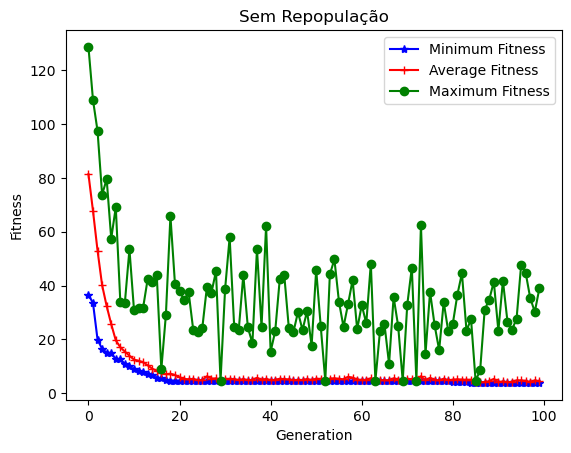

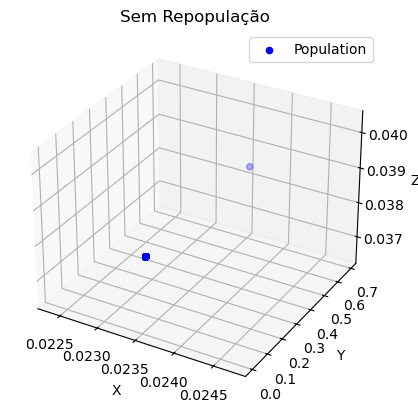

99 99


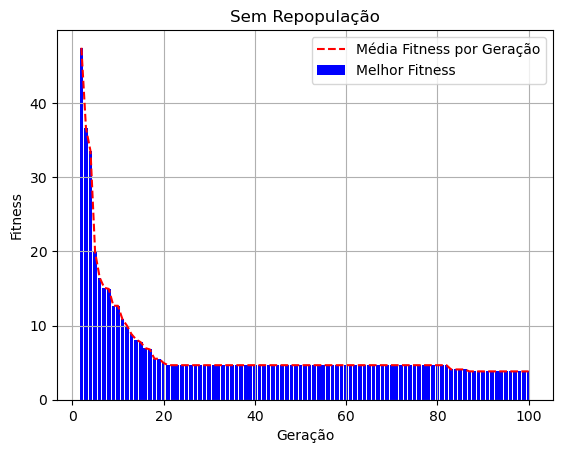

    Generations                               Variaveis de Decisão  \
0             1  [0.8442733322712778, 0.30230648261637305, 0.28...   
1             2  [0.9795948783810301, 0.9083640786977903, 0.672...   
2             3  [0.9795948783810301, 0.9083640786977903, 0.672...   
3             4  [0.1611609283310863, 0.005413262184592149, 0.9...   
4             5  [0.06622756930119489, 0.005413262184592149, 0....   
..          ...                                                ...   
95           96  [0.023549367319780273, 0.005413262184592149, 0...   
96           97  [0.023549367319780273, 0.005413262184592149, 0...   
97           98  [0.023549367319780273, 0.005413262184592149, 0...   
98           99  [0.023549367319780273, 0.005413262184592149, 0...   
99          100  [0.023549367319780273, 0.005413262184592149, 0...   

    Evaluations           Best Fitness       Media  Desvio Padrao  
0           190                     ()  100.205816      21.139640  
1           280  (47.43

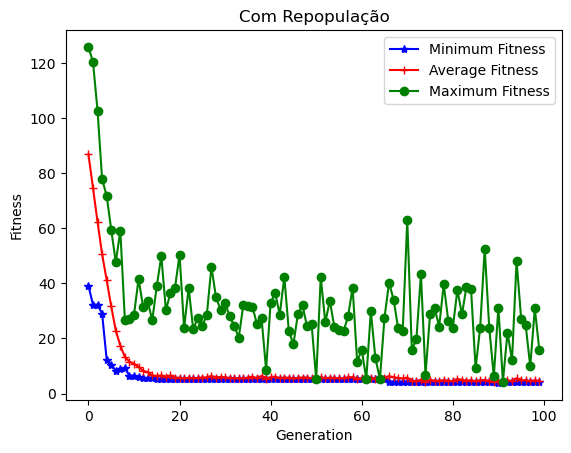

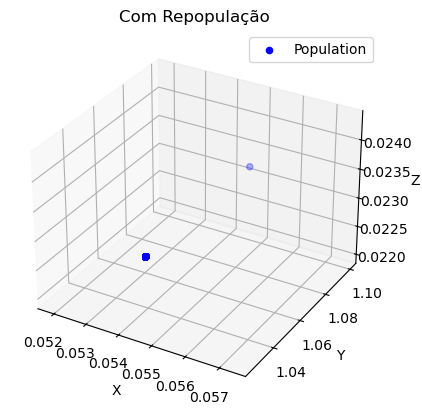

99 99


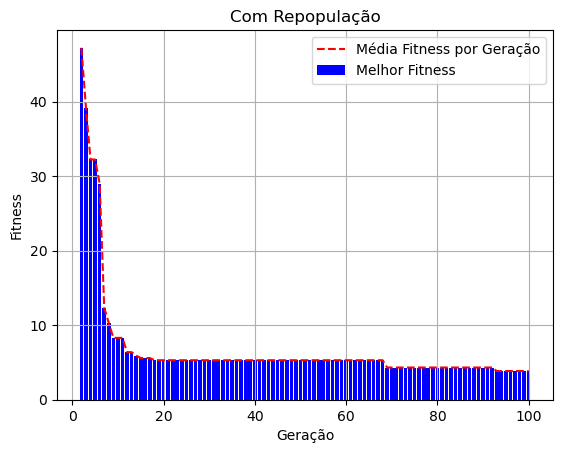

    Generations                               Variaveis de Decisão  \
0             1  [0.44137624348906845, 0.960601249197356, 0.358...   
1             2  [0.9977865550413467, 0.2584339363596434, 0.989...   
2             3  [0.054622293605051, 1.025287894060778, 0.08590...   
3             4  [0.054622293605051, 1.025287894060778, 0.08590...   
4             5  [0.054622293605051, 1.025287894060778, 0.08590...   
..          ...                                                ...   
95           96  [0.054622293605051, 1.025287894060778, 0.02316...   
96           97  [0.054622293605051, 1.025287894060778, 0.02316...   
97           98  [0.054622293605051, 1.025287894060778, 0.02316...   
98           99  [0.054622293605051, 1.025287894060778, 0.02316...   
99          100  [0.054622293605051, 1.025287894060778, 0.02316...   

    Evaluations           Best Fitness       Media  Desvio Padrao  
0          9340                     ()  104.882979      23.005004  
1          9428  (47.23

In [5]:
from src.models.Setup import Setup
from src.models.DataExploration import DataExploration
from src.models.AlgEvolution import AlgEvolution
import time


def main():
    tempo1 = time.time()

    data_visual = DataExploration()
    setup = Setup()
    alg = AlgEvolution(setup)
    alg_NO_repopulation = AlgEvolution(setup)

    # Sem repopulação
    print("\n\nAlg evolutivo Sem repopulação")
    alg_NO_repopulation.setup.num_repopulation = 0
    (
        pop_without_repopulation,
        logbook_without_repopulation,
        best_without_repopulation,
    ) = alg_NO_repopulation.run()
    data_visual.visualize(
        logbook_without_repopulation, pop_without_repopulation, repopulation=False
    )
    data_visual.plot_best_fitness_generation(
        alg_NO_repopulation.getters()["best_fitness_array"], repopulation=False
    )

    # Após a execução do algoritmo sem repopulação
    best_df_without_repopulation, fitness_df_without_repopulation = (
        alg_NO_repopulation.get_population_dataframes()
    )
    print(best_df_without_repopulation)

    # Com repopulação
    print("\nAlg evolutivo com repopulação")
    pop_with_repopulation, logbook_with_repopulation, best_with_repopulation = alg.run()
    data_visual.visualize(
        logbook_with_repopulation, pop_with_repopulation, repopulation=True
    )
    data_visual.plot_best_fitness_generation(
        alg.getters()["best_fitness_array"], repopulation=True
    )

    best_df_with_repopulation, fitness_df_with_repopulation = (
        alg.get_population_dataframes()
    )
    print(best_df_with_repopulation)

    # camparando as populações
    print("Comparing populations")
    print(pop_without_repopulation)
    print(pop_with_repopulation)

    tempo2 = time.time()
    print(f"Total execution time: {round(tempo2-tempo1,2)} seconds")


main()
